# Linear Regression Exercise

## Use linear regression on the *bodyfat* dataset

We are going to follow the same pipeline than in the lab session but now with a simple dataset.  

- [ ] Visualize your dataset. Does it have anything strange?
- [ ] Split your dataset in train and test. 
- [ ] Design a pre-processing for your dataset and apply it to your partitions. 
- [ ] Train a Linear Regression model.
- [ ] Train a Ridge Regression model with cross-validation.  
- [ ] Train a Lasso Regression model with cross-validation.  
- [ ] Compare your three models using cross-validation metrics and looking into their weights. Do they show strong differences?
- [ ] Compute the generalization performance of the best model.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

In [35]:
bodyfat_data = pd.read_csv("bodyfatdata.txt", 
                        delim_whitespace=True, 
                        names=['triceps', 'thigh', 'midarm', 'bodyfat'])

N=bodyfat_data.shape[0]
bodyfat_data.describe()

,triceps,thigh,midarm,bodyfat
count,20.000,20.000,20.000,20.000
mean,25.305,51.170,27.620,20.195
std,5.023,5.235,3.647,5.106
min,14.600,42.200,21.300,11.700
25%,21.500,47.775,24.750,17.050
50%,25.550,52.000,27.900,21.200
75%,29.900,54.625,30.025,24.275
max,31.400,58.600,37.000,27.200


[x] Visualize your dataset. Does it have anything strange?

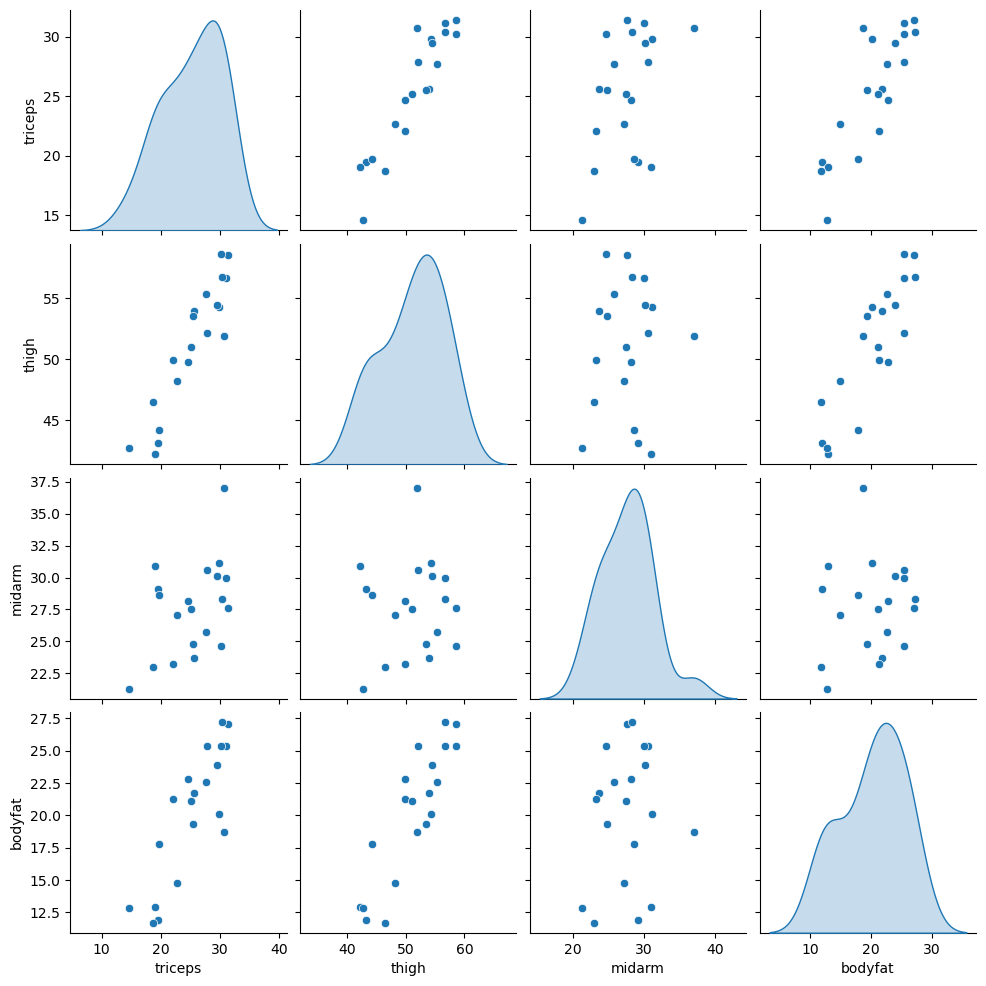

In [8]:
# Plot the variables
sns.pairplot(bodyfat_data, diag_kind='kde')

I don't see anything specially strange in the dataset. There are some outliers in the data, but they are not too far from the rest of the data.

[x] Split your dataset in train and test.

In [9]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(bodyfat_data[['triceps', 'thigh', 'midarm']],bodyfat_data['bodyfat'], test_size=0.33, random_state=42)

[x] Design a pre-processing for your dataset and apply it to your partitions.

As our dataset is all numerical, we don't need to do any categorical encoding. We will just scale the data.

In [33]:
from sklearn.preprocessing import MinMaxScaler

def scaling_preprocessing(X, y, scaler: MinMaxScaler=None):
    print('Original shape:{}'.format(X.shape))
    categorical_columns = X.dtypes[X.dtypes == 'category'].index.values
    
    # We scale the numerical columns
    numerical_columns = [c for c in X.columns if c not in categorical_columns]
    if scaler is None: 
        # We only want the scaler to fit the train data
        scaler = MinMaxScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    else:
        print('Using existing scaler')
        X[numerical_columns] = scaler.transform(X[numerical_columns])
    
    # We kill categorical columns
    X=X.drop(columns=categorical_columns)
    print('Droped: {}'.format(categorical_columns))
    # We remove missing values
    X=X.dropna()
    y=y[X.index]
    print('New shape:{}'.format(X.shape))
    return X, y, scaler

In [39]:
X_train, X_test, y_train, y_test = train_test_split(bodyfat_data[['triceps', 'thigh', 'midarm']],bodyfat_data['bodyfat'], test_size=0.33, random_state=42)

X_train, y_train, scaler = scaling_preprocessing(X_train,y_train)
X_train.describe()

Original shape:(13, 3)
Droped: []
New shape:(13, 3)


,triceps,thigh,midarm
count,13.000,13.000,13.000
mean,0.615,0.512,0.433
std,0.329,0.328,0.258
min,0.000,0.000,0.000
25%,0.304,0.264,0.280
50%,0.649,0.595,0.401
75%,0.905,0.742,0.592
max,1.000,1.000,1.000


In [40]:
print(X_test.describe())
X_test, y_test, _ = scaling_preprocessing(X_test,y_test,scaler)
X_test.describe()

       triceps   thigh  midarm
count    7.000   7.000   7.000
mean    26.000  52.343  26.743
std      4.254   5.207   2.822
min     19.500  43.100  23.200
25%     23.400  49.850  24.150
50%     25.600  53.900  28.200
75%     29.850  55.550  28.700
max     30.400  58.600  30.100
Original shape:(7, 3)
Using existing scaler
Droped: []
New shape:(7, 3)


,triceps,thigh,midarm
count,7.000,7.000,7.000
mean,0.679,0.622,0.347
std,0.253,0.319,0.180
min,0.292,0.055,0.121
25%,0.524,0.469,0.182
50%,0.655,0.718,0.439
75%,0.908,0.819,0.471
max,0.940,1.006,0.561


[x] Train a Linear Regression model.

In [14]:
# Fit a linear regression model
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Print the coefficients
print('Coefficients: {}'.format(lr.coef_))

# Print the intercept
print('Intercept: {}'.format(lr.intercept_))

# Print the R^2 on the training data
print('R^2: {}'.format(lr.score(X_train, y_train)))

Coefficients: [ 70.594 -45.791 -32.65 ]
Intercept: 13.347780602471307
R^2: 0.7727728259078854


[x] Train a Ridge Regression model with cross-validation.

In [18]:
# Fit a ridge regression model with cross-validation
from sklearn.linear_model import RidgeCV

In [20]:
ridge = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge.fit(X_train, y_train)

# Print the coefficients
print('Coefficients: {}'.format(ridge.coef_))

# Print the intercept
print('Intercept: {}'.format(ridge.intercept_))

# Print the R^2 on the training data
print('R^2: {}'.format(ridge.score(X_train, y_train)))

# Print the best alpha
print('Best alpha: {}'.format(ridge.alpha_))

Coefficients: [1.341 1.384 0.364]
Intercept: 17.517458570529598
R^2: 0.2776666291048612
Best alpha: 10.0


[x] Train a Lasso Regression model with cross-validation.

In [21]:
# Fit a lasso regression model with cross-validation
from sklearn.linear_model import LassoCV

In [22]:
lasso = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
lasso.fit(X_train, y_train)

# Print the coefficients
print('Coefficients: {}'.format(lasso.coef_))

# Print the intercept
print('Intercept: {}'.format(lasso.intercept_))

# Print the R^2 on the training data
print('R^2: {}'.format(lasso.score(X_train, y_train)))

# Print the best alpha
print('Best alpha: {}'.format(lasso.alpha_))

Coefficients: [ 5.139  8.549 -0.   ]
Intercept: 11.674265170552072
R^2: 0.7564968958422419
Best alpha: 0.01


[x] Compare your three models using cross-validation metrics and looking into their weights. Do they show strong differences?

The coefficients are and R^2 are:

linear regression: [ 70.594 -45.791 -32.65 ] and 0.7727728259078854
ridge: [1.341 1.384 0.364] and 0.2776666291048612
lasso: [ 5.139  8.549 -0.   ] and 0.7564968958422419

As we can see, the linear regression model has the best R^2, but the lasso model has smaller coefficientes, with some of them being 0. This means that the lasso model has selected only 2 features, and the third one is not relevant for the model. The ridge model is performing much worse than the other two, with a very low R^2.

[x] Compute the generalization performance of the best model.

The best model is the linear regression model, with an R^2 of 0.7727728259078854. Let's see how it performs on the test set.

Mean squared error: 4.343249107948732
R^2: 0.790952019282653


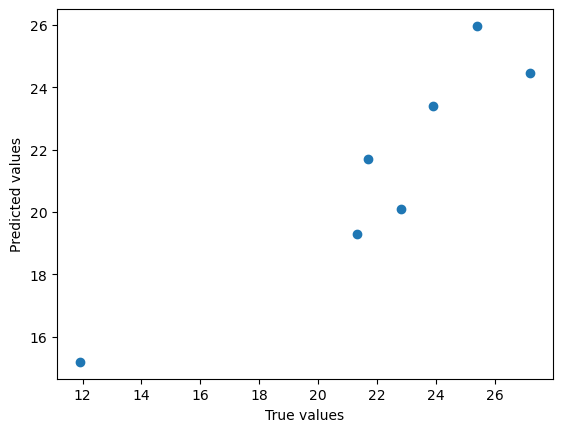

In [41]:
# Use the linear regression model to predict the test set
y_pred = lr.predict(X_test)

# Compute the mean squared error and the R^2 on the test set
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: {}'.format(mean_squared_error(y_test, y_pred)))
print('R^2: {}'.format(r2_score(y_test, y_pred)))

# plot the comparison between the true and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

## Advanced Exercise: Try to improve the results of the lab session

There are some points that could be improved from the lab session. 
- [ ] Linear regression is strongly affected by outliers. Design a strategy for removing outliers. Does it improve the validation metrics with respect to the best ones of the lab. 
- [ ] We have ignored (almost) completely our missing values. Design a strategy for handling missing values. Does it improve the validation metrics with respect to the best ones of the lab.   
- [ ] Some variables are not looking gaussian. Transforming them could improve your model performance. Does this improve validation metrics and/or generalization of the best model?

In [42]:
life_expentancy_data = pd.read_csv('Life_Expectancy_Data.csv')
# We remove spaces and symbols to avoid problems with statsmodel GLM
life_expentancy_data.columns = [c.lower().strip().replace(' ','_').replace('/','_').replace('-','_') for c in life_expentancy_data.columns] 

# We change the type of categorical variables into category
categorical_columns = list(life_expentancy_data.dtypes[life_expentancy_data.dtypes == 'O'].index.values)
for column in categorical_columns:
    life_expentancy_data[column] = life_expentancy_data[column].astype('category')

life_expentancy_data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.280,65.0,1154,...,6.0,8.16,65.0,0.1,584.259,3.374e+07,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.524,62.0,492,...,58.0,8.18,62.0,0.1,612.697,3.276e+05,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219,64.0,430,...,62.0,8.13,64.0,0.1,631.745,3.173e+07,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184,67.0,2787,...,67.0,8.52,67.0,0.1,669.959,3.697e+06,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097,68.0,3013,...,68.0,7.87,68.0,0.1,63.537,2.979e+06,18.2,18.2,0.454,9.5


[x] Linear regression is strongly affected by outliers. Design a strategy for removing outliers. Does it improve the validation metrics with respect to the best ones of the lab.

Let's remove all outliers of numerical attributes using the IQR method. We will remove all rows that have a value that is more than 1.5 times the IQR from the 25th and 75th percentiles.

In [43]:
def remove_outliers(df):
    # Select the numerical columns
    numerical_columns = df.dtypes[df.dtypes != 'category'].index.values

    # We remove outliers for each numerical column
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

    return df

In [44]:
life_expentancy_data = remove_outliers(life_expentancy_data)

In [46]:
X = life_expentancy_data.loc[:,life_expentancy_data.columns != 'life_expectancy']
y = life_expentancy_data['life_expectancy']

In [59]:
from sklearn.model_selection import cross_val_score
lambdas = [0.01, 0.1, 1.0, 10.0, 100.0]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train, scaler = scaling_preprocessing(X_train,y_train)
X_test, y_test, _ = scaling_preprocessing(X_test,y_test,scaler)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train,y_train)
r2_lr_scaled = np.mean(cross_val_score(lr_scaled, X_train,y_train, cv=5, scoring='r2'))

ridge_cv_scaled =RidgeCV(alphas=lambdas,cv=5)
ridge_cv_scaled.fit(X_train,y_train)
r2_ridge_scaled = np.mean(cross_val_score(ridge_cv_scaled, X_train,y_train, cv=5, scoring='r2'))


lasso_cv_scaled =LassoCV(alphas=lambdas,cv=5)
lasso_cv_scaled.fit(X_train,y_train)
r2_lasso_scaled = np.mean(cross_val_score(ridge_cv_scaled, X_train,y_train, cv=5, scoring='r2'))

weights = pd.DataFrame({'lr scaled':lr_scaled.coef_, 'ridge_cv scaled':ridge_cv_scaled.coef_, 'lasso_cv scaled':lasso_cv_scaled.coef_},index=X_train.columns)
weights.T

Original shape:(227, 21)
Droped: ['country' 'status']
New shape:(227, 19)
Original shape:(112, 21)
Using existing scaler
Droped: ['country' 'status']
New shape:(112, 19)


,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
lr scaled,0.694,-1.152,-1.625,-1.093,2.340,-0.129,0.616,-1.020,-1.036,-2.024,3.997,-0.770,0.720,-3.521,0.820,17.690,-25.878,18.749,-5.968
ridge_cv scaled,0.683,-1.221,-1.923,-1.182,2.417,-0.125,0.562,-1.035,-0.826,-1.895,4.063,-0.894,0.761,-3.565,0.828,13.122,-21.054,18.520,-5.760
lasso_cv scaled,0.486,-1.641,-2.251,-0.870,1.999,-0.062,0.000,-0.837,-0.000,-1.159,4.010,-1.475,0.620,-2.963,0.609,-0.000,-6.888,16.627,-4.201


In [61]:
r2_results = pd.DataFrame({'lr':r2_lr_scaled, 'ridge_cv':r2_ridge_scaled, 'lasso_cv':r2_lasso_scaled,},index=['CV R2'])

r2_results.loc['Train R2', :] =[r2_score(y_train,lr_scaled.predict(X_train)),
                                r2_score(y_train,ridge_cv_scaled.predict(X_train)),
                                r2_score(y_train,lasso_cv_scaled.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results.loc['lambda','ridge_cv']=ridge_cv_scaled.alpha_
r2_results.loc['lambda','lasso_cv']=lasso_cv_scaled.alpha_
r2_results

,lr,ridge_cv,lasso_cv
CV R2,0.661,0.660,0.660
Train R2,0.752,0.751,0.742
lambda,0.000,0.010,0.010


In [53]:
def categorical_preprocessing(X, y,scaler: MinMaxScaler=None):
    print('Original shape:{}'.format(X.shape))
    categorical_columns =X.dtypes[X.dtypes == 'category'].index.values
    numerical_columns = [c for c in X.columns if c not in categorical_columns]
    
    # Scale numerical variables
    if scaler is None: 
        # We only want the scaler to fit the train data
        scaler = MinMaxScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    else: 
        X[numerical_columns] = scaler.transform(X[numerical_columns])
    
    # Apply one hot encoding to categorical variables
    for column in categorical_columns:
        X_one_hot = pd.get_dummies(X[column], prefix=column)
        X = X.merge(X_one_hot,left_index=True,right_index=True)
        X = X.drop(columns=[column])
    
    # Drop missings
    X=X.dropna()
    y=y[X.index]
    print('New shape:{}'.format(X.shape))
    return X, y, scaler

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train, scaler = categorical_preprocessing(X_train,y_train)
X_test, y_test, _ = categorical_preprocessing(X_test,y_test,scaler)

Original shape:(227, 21)
New shape:(227, 214)
Original shape:(112, 21)
New shape:(112, 214)


In [56]:
lr_one_hot = LinearRegression()
lr_one_hot.fit(X_train,y_train)

r2_lr_one_hot_train = lr_one_hot.score(X_train,y_train)
r2_lr_one_hot_cv = np.mean(cross_val_score(lr_one_hot, X_train,y_train, cv=5, scoring='r2'))

print('Train R2 score: {}\nCross-Validation R2 score: {}'.format(r2_lr_one_hot_train, r2_lr_one_hot_cv))

Train R2 score: 0.9373683306464313
Cross-Validation R2 score: -5.020548489380011e+23


/home/jose/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.985e-01, tolerance: 2.883e-01
  model = cd_fast.enet_coordinate_descent(
/home/jose/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.854e-01, tolerance: 2.998e-01
  model = cd_fast.enet_coordinate_descent(


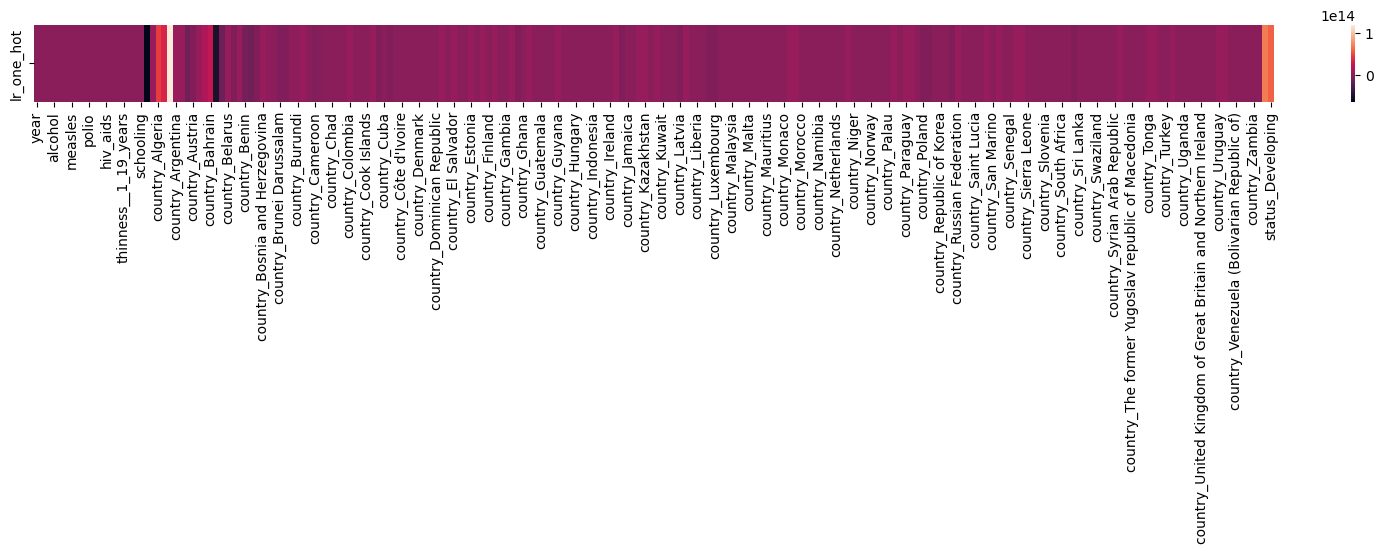

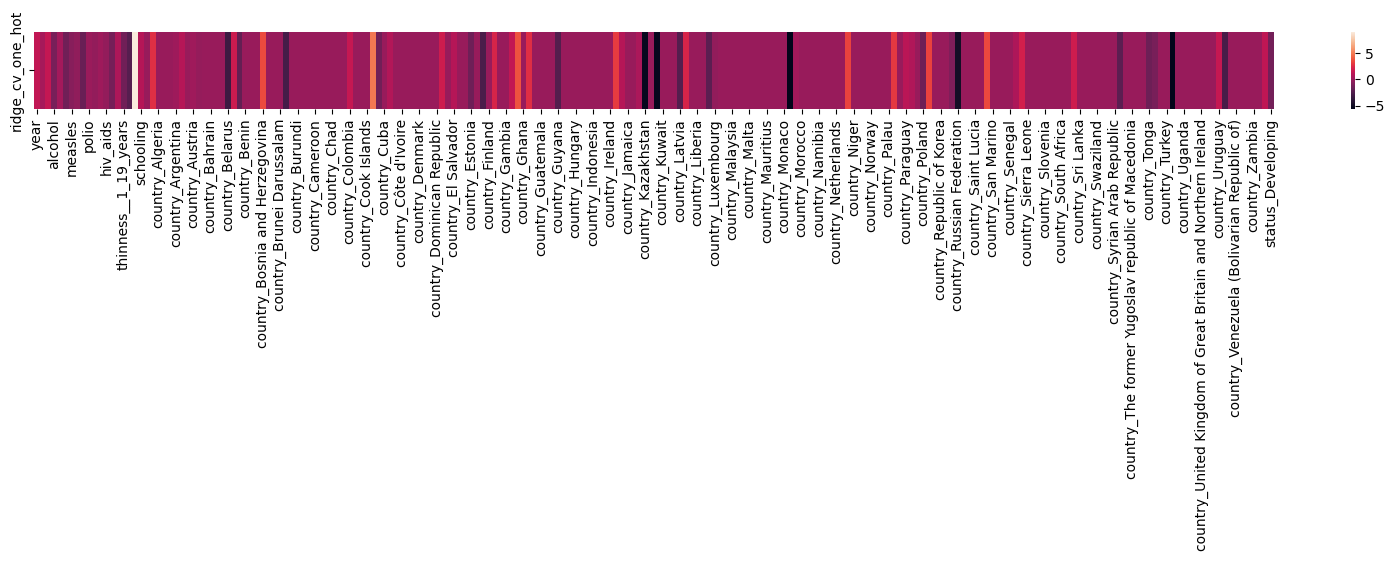

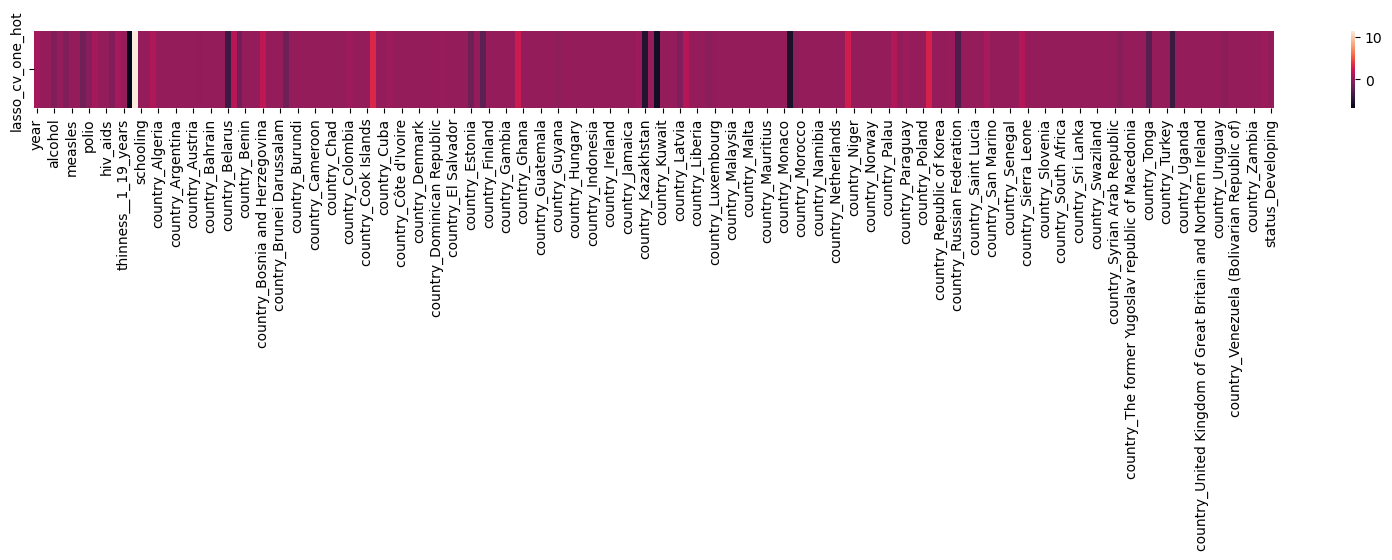

In [57]:
ridge_cv_one_hot = RidgeCV(alphas=lambdas, cv=5)
ridge_cv_one_hot.fit(X_train, y_train)

r2_ridge_one_hot_train = ridge_cv_one_hot.score(X_train,y_train)
r2_ridge_one_hot_cv = np.mean(cross_val_score(ridge_cv_one_hot, X_train, y_train, cv=5, scoring='r2'))

lasso_cv_one_hot = LassoCV(alphas=lambdas, cv=5)
lasso_cv_one_hot.fit(X_train, y_train)

r2_lasso_one_hot_train = ridge_cv_one_hot.score(X_train,y_train)
r2_lasso_one_hot_cv = np.mean(cross_val_score(lasso_cv_one_hot, X_train, y_train, cv=5, scoring='r2'))

weights = pd.DataFrame(
    {
        'lr_one_hot': lr_one_hot.coef_,
        'ridge_cv_one_hot': ridge_cv_one_hot.coef_,
        'lasso_cv_one_hot': lasso_cv_one_hot.coef_
    },
    index=X_train.columns)

for column in weights.columns:
    fig= plt.figure(figsize=(20,1))
    ax=sns.heatmap(weights[[column]].T)

In [62]:
r2_results.loc[:, 'lr_one_hot'] =[r2_lr_one_hot_cv, r2_lr_one_hot_train, 0]
r2_results.loc[:, 'ridge_cv_one_hot'] =[r2_ridge_one_hot_cv, r2_ridge_one_hot_train, ridge_cv_one_hot.alpha_]
r2_results.loc[:, 'lasso_cv_one_hot'] =[r2_lasso_one_hot_cv, r2_lasso_one_hot_train, lasso_cv_one_hot.alpha_]
r2_results

,lr,ridge_cv,lasso_cv,lr_one_hot,ridge_cv_one_hot,lasso_cv_one_hot
CV R2,0.661,0.660,0.660,-5.021e+23,0.814,0.806
Train R2,0.752,0.751,0.742,9.374e-01,0.932,0.932
lambda,0.000,0.010,0.010,0.000e+00,0.100,0.010


As we can see, removing outliers is not improving the performance in comparison to what we got in the lab.